In [1]:
import pandas as pd
import numpy as np

In [2]:
with open("train/train.csv", 'r') as file:
    df = pd.read_csv(file)

In [3]:
print(df.columns)
df.head()

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
df.shape

(14993, 24)

In [5]:
df = df[df["Quantity"] == 1]
df.drop(["RescuerID", "State", "VideoAmt", "Description", "Name", "PetID", "Quantity"], axis = 1, inplace = True)

In [6]:
df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,PhotoAmt,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,100,1.0,2
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,0,2.0,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,0,7.0,3
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,150,8.0,2
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,0,3.0,2


In [7]:
df.shape

(11565, 17)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("AdoptionSpeed", axis = 1), df["AdoptionSpeed"], test_size=0.3, random_state=1)

In [91]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=12,random_state=1)
clf_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [92]:
print("Train = " , clf_rf.score(X_train, y_train))
print("Test = ", clf_rf.score(X_test, y_test))

Train =  0.9651636812847437
Test =  0.3579250720461095


Text(0.5, 0, 'Number of Trees')

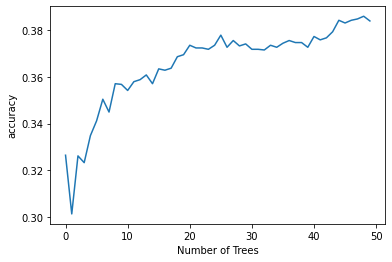

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt

trees=range(50)
accuracy=np.zeros(50)
for idx in range(len(trees)):
    clf_rf=RandomForestClassifier(random_state=1, n_estimators=idx + 1)
    clf_rf.fit(X_train,y_train)
    accuracy[idx]=clf_rf.score(X_test, y_test)  

plt.plot(trees, accuracy)
plt.ylabel('accuracy')
plt.xlabel('Number of Trees')

In [94]:
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf':list(range(3,6)),'min_samples_split':list(range(2,100,1)),
          'n_estimators':list(range(45,95,5))}
clf_rf=RandomForestClassifier(random_state=1, n_estimators=idx + 1)
clf_gs=GridSearchCV(clf_rf, params, scoring = 'accuracy', cv=5, n_jobs=4, verbose=2)
clf_gs.fit(df.drop("AdoptionSpeed", axis = 1), df["AdoptionSpeed"])

Fitting 5 folds for each of 2940 candidates, totalling 14700 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   28.9s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  1.9min


KeyboardInterrupt: 

In [95]:
clf_gs.best_score_# your code here

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [ ]:
clf_gs.best_params_# your code here

In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import scale
X_train = scale(X_train)
clf_SVC = SVC(random_state=1, kernel="poly")
clf_SVC.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [16]:
print("Train = " , clf_SVC.score(X_train, y_train))
print("Test = ", clf_SVC.score(X_test, y_test))

Train =  0.4652254478072885
Test =  0.260806916426513


In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {'kernel': ['rbf'], 'C': [0.9, 1.], 'decision_function_shape': ['ovo', 'ovr']}
clf_SVC = SVC(random_state=1)
clf_gs = GridSearchCV(clf_SVC, params, scoring = 'accuracy', cv=5, n_jobs=4, verbose=2)
clf_gs.fit(df.drop("AdoptionSpeed", axis = 1), df["AdoptionSpeed"])

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   35.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.9, 1.0],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [23]:
clf_gs.best_score_# your code here

0.33523562472978813

In [24]:
clf_gs.best_params_# your code here

{'C': 1.0, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}

In [25]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

In [26]:
from sklearn.preprocessing import StandardScaler
features = df.drop('AdoptionSpeed', axis=1).columns# Separating out the features
x = df.loc[:, features].values# Separating out the target
y = df.loc[:,['AdoptionSpeed']].values# Standardizing the features
x = StandardScaler().fit_transform(x)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [28]:
finalDf = pd.concat([principalDf, df[['AdoptionSpeed']]], axis = 1)

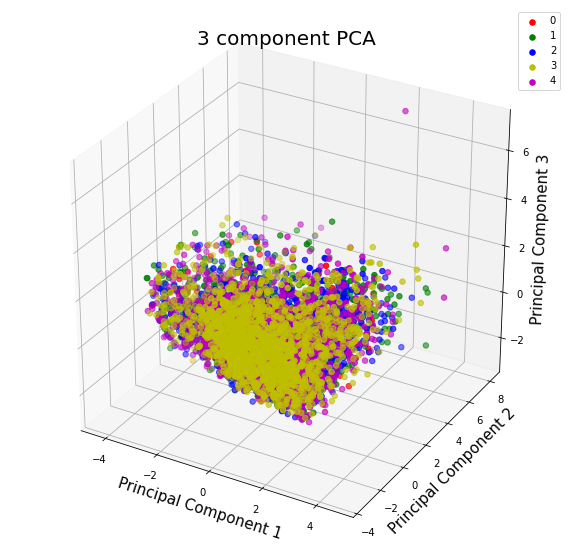

<Figure size 576x288 with 0 Axes>

In [29]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure(figsize = (10,10))
plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [0, 1, 2, 3, 4]
colors = ['r', 'g', 'b', 'y', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['AdoptionSpeed'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 30)
ax.legend(targets)
ax.grid()

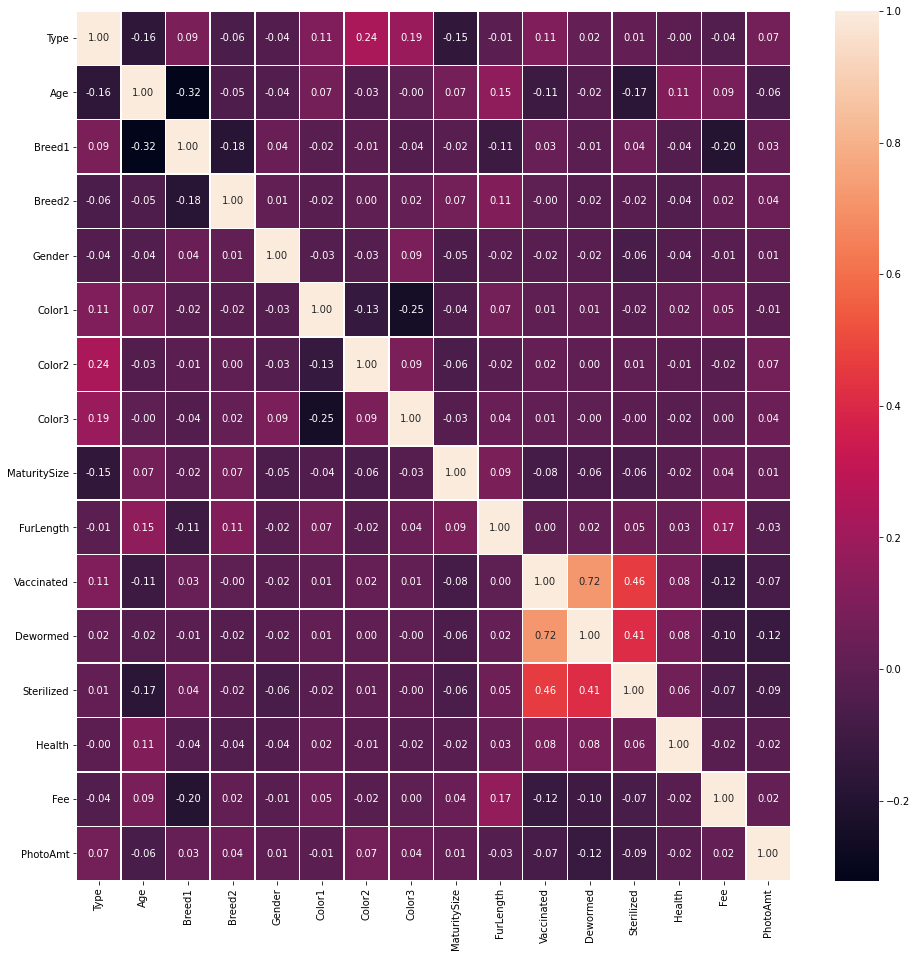

In [111]:
import seaborn as sns
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()


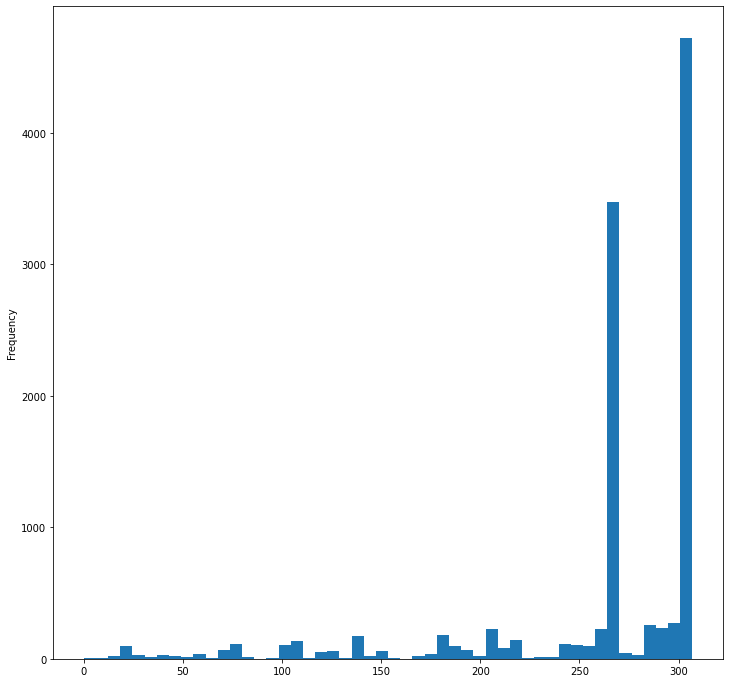

In [30]:
df['Breed1'].plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.savefig('')
plt.show()



In [31]:
most_frequents = df['Breed1'].value_counts()[:10].index.tolist()# 307 are mixed breeds
print(most_frequents)

breeds = pd.read_csv('breed_labels.csv')
breeds.loc[breeds['BreedID'].isin(most_frequents)]
for i in most_frequents:
    breed = breeds.loc[breeds['BreedID'] == i]
    type = 'Dog' if breed['Type'].item() == 1 else 'Cat'
    print(type, breed['BreedName'].item())

[307, 266, 265, 299, 264, 292, 285, 205, 141, 179]
Dog Mixed Breed
Cat Domestic Short Hair
Cat Domestic Medium Hair
Cat Tabby
Cat Domestic Long Hair
Cat Siamese
Cat Persian
Dog Shih Tzu
Dog Labrador Retriever
Dog Poodle
